In [1]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from astropy.visualization import astropy_mpl_style, quantity_support
import astropy.units as u
from astropy.coordinates import AltAz, EarthLocation, SkyCoord, ICRS, Longitude
from astropy.time import Time

plt.style.use(astropy_mpl_style)

In [2]:
"""Turn into a single Command

plotObservable(array,targets,start_time,obs_period,print)
"""

'Turn into a single Command\n\nplotObservable(array,targets,start_time,obs_period,print)\n'

## Load array positions

In [3]:
desired_array = 'Mid' #(or 'Low')
if desired_array == 'Mid':
    print("Array:"+desired_array+" --> THIS HAS DUMMY VALUES")
    array_x = [1.0]
    array_y = [2.0]
    array_z = [3.0]
    
    geographic_location = EarthLocation.of_site('MeerKAT')
    print(geographic_location)
    utcoffset = +2*u.hour  # FIX!
    time_now = Time(datetime.utcnow(), scale='utc') - utcoffset
    time_zone = '[SAST]'
    
elif desired_array == 'Low':
    print('FILL THIS IN ADAM')
    """
    array_x = [1.0]
    array_y = [2.0]
    array_z = [3.0]
    
    geographic_location = EarthLocation.of_site('MeerKAT')
    utcoffset = +8*u.hour  # FIX!
    time_now = Time(datetime.utcnow(), scale='utc') - utcoffset
    """
else:
    print("That is not an SKA Telescope ")
    5109271.366196692m, y = 2006687.3689716842m, z = -3239042.17785115m
Average SKA_Mid position (using core SKA antennas within 1000.0m): x = 5109258.108828629m, y = 2006700.7657708493m, z = -3239135.594182808m


Array:Mid --> THIS HAS DUMMY VALUES
(5109360.133, 2006852.586, -3238948.127) m


## Define Time range

In [5]:
obs_period_length = 12.0*u.hour

obs_period_start = Time('2023-7-5 12:00:00') # UTC
obs_period_start_local = obs_period_start - utcoffset # LOCAL
start_hour_local = float(obs_period_start_local.datetime.strftime("%H"))

obs_period_end_local = obs_period_start_local + obs_period_length # LOCAL
obs_period_end = obs_period_start_local + obs_period_length # UTC
end_hour_local = float(obs_period_end_local.datetime.strftime("%H"))

obs_period_delta_local = np.linspace(0.0, obs_period_length.value, 100)*u.hour


## Set Target Coordinate(s) 
Give target coordinate(s) in ICRS

_single source only supported so far_

In [6]:
# target = SkyCoord(frame = ICRS, ra = '19:34:23.5000', dec = '-60:00:00.000', unit = (u.hourangle, u.deg))
coords = ["16:50:16.635 -20:44:48.37"]
target = SkyCoord(coords, frame = 'icrs', unit = (u.hourangle, u.deg))
"""Convert target coords to Az_el (called AltAz in astropy)"""
target_azel = target.transform_to(AltAz(obstime = obs_period_start_local+obs_period_delta_local, location = geographic_location))


# coords = ["1:12:43.2 +31:12:43", "1 12 43.2 +31 12 43"]
# c = SkyCoord(coords, frame = 'icrs', unit = (u.hourangle, u.deg))
# print(c)

## Do the plot

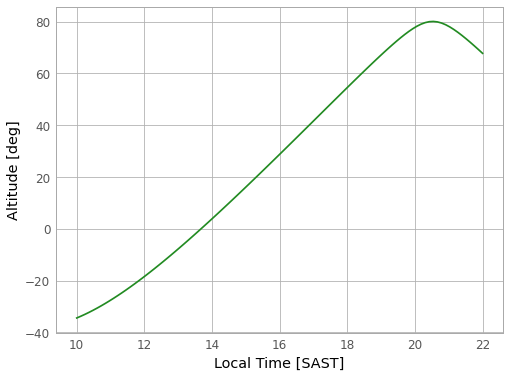

In [20]:
"""TO DO:
    1. Make this a more sensible use of plt
    2. Prettify it :D 
"""

plt.plot(obs_period_delta_local+(float(obs_period_start_local.datetime.strftime("%H"))*u.hour), target_azel.alt, color = 'forestgreen')
plt.xlabel('Local Time '+time_zone)
plt.ylabel('Altitude [deg]')
plt.show()